In [84]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px


import seaborn as sns
sns.set(style = "whitegrid", 
        color_codes = True,
        font_scale = 1.5)
import os
import re

In [85]:
# we are working with different file systems (apple vs windows) so we need to automatically
# generate path to data on the local machine.

notebook_wd = os.getcwd()
project_folder = re.match(r'(.*)[\\|\/]analysis', notebook_wd)
full_path = project_folder.group(1)

if os.name =='nt':
    data_path = '\\data\\'
else:
    data_path ='/data/'

full_path+data_path

'C:\\Users\\emman\\Documents\\git\\DC200_GradProj\\data\\'

In [86]:
df = pd.read_csv(full_path+data_path+'plant_pollinator_diversity_set1.csv')
#plant_pollinator_2 = pd.read_csv('data/plant_pollinator_diversity_set2.csv')

In [87]:
# Create temperature in farenheit
df['temp_f'] = df['TEMP']* 1.8000 + 32.00
# Temperature falls within normal bounds 
df['temp_f'].describe()

# Create date time values for the dataset
df['DATETIME'] = pd.to_datetime(df['SAMPLEDATE'])

df['Date'] = pd.to_datetime(df['SAMPLEDATE'], format='%Y-%m-%d')

df['MY'] = df['DATETIME'].dt.to_period('M')
# Create a month and year variable 
df['month'] = df['DATETIME'].dt.month



### Estimation 

An evaluation of the report based on the Data Science Lifecycle (10 points, 2 points per component). The review should include at least one strong point and one suggestion for improvement for each of the following components in the project:

    Data collection and sampling
    Data cleaning
    Exploratory data analysis (including data wrangling and visualization)
    Data modeling (including feature engineering, selection of the model, and evaluation of the model’s performance)
    Inference (do the results from the model sufficiently support the conclusion within the report?)

# Data Sampling and Collection

## How were the data collected?

Our group is utilizing the `plant_pollinator_diversity_set1.csv` that contains ecological data collected from a long-term observation study from 2011 to 2018 that focuses on plant-pollinator interaction and its impact on local biodiversity. The data is from an annual collection of plant-pollinator interaction data from 15 minute plot watches in Montane Meadows in Oregon. The data was collected through June to September of each year. Thus, data from late-fall to spring is unavailable for each year. 

Sampling plots, along with other tools like transects and point method, are tools used for field observations to collect ecological data. The goal is to get unbiased samples of a sufficient quantity that statistical analyses will be sounder.

An ecologist made observations for 15 minutes at one specific plot indicated by the the `PLOT_ID` in addition to other plots on that same day. The chronological period in which a survey took place is indicated by the `WATCH` variable. Various weather conditions were reported such as `CLOUDS`, `WIND`, and `TEMP` during the observations. Pollinator, plant and interaction (`PLTSP_NAME`, `VISSP_NAME`, `NO_INT`) data are also observation-based variables. Thus, the data was collected exclusively by human observations in a given 15 min window during the months of June and September from 2011 to 2018.

## Was there any potential bias introduced in the sampling process?

1. Biologist/Ecologist Fatigue: The observer may have less precision in accurately documenting all the potential plants and pollinators for an extended period of time. Therefore, observations that occured later in the day might have less accurate data.
2. Biologist/Ecologist Accuracy: The biologist/ecologist who took these samples may have not been as well trained as others. Also, reliance on senior staff may also hinder correct identification. For example, a more junior researcher may have to consult a supervisor if that researcher is unable to determine the species. The supervisor may or may not consult a field guide and depend on touch, feel and personal knowledge to identify a particular species. This may lead to misidentification and misrepresentation of the data. 
3. Human Error: Similar to what was stated above, human error can occur in misidentification as well as other observation processes. In the instance of collecting the temperature data, a third of the observation have null values. Thus, some of the data wasn't collected based on the inability for the Biologist/Ecologist to determine the correct value (i.e. temperature).
4. The data does not encompass the spring season. Thus, there are interactions that are not recorded during that time.

# Data Dictionary 

## `CLOUDS`

1. S = Sunny
2. SH = Shade
3. PC = Partly Cloudy
4. C = Cloudy

## `WIND`

1. BR = Breezy
2. ST = Still

## `MINUTE`

On a given sample date, an observer will be there for 15 minutes, which is why the numbers in this variable are from 1-15

## `PLOT_ID`

Plot ID for a plot in a given meadow. There are 180 individual plots.

## `PLOT`

Plots in a given meadow. They are numbered 1-10. There are 180 individual plots.

## `WATCH`

* Code	
    * Definition
* 0.5	
    * Phenological period 0.5 (The cone peak complex was sampled an extra time in 2011 during the first week 0.5, 1.5 were used)	
* 1	
    * Phenological period 1	
* 1.5	
    * Phenological period 1.5 (The cone peak complex was sampled an extra time in 2011 during the first week 0.5, 1.5 were used)	
* 2	
    * Phenological period 2	
* 3	
    * Phenological period 3	
* 4	
    * Phenological period 4	
* 5	
    * Phenological period 5	
* 6	
    * Phenological period 6	
* 7	
    * Phenological period 7

## Observations 

1. Dataset covers years 2011-2018
2. Plant Pollinators 1 is the number of pollinator interactions with flowers in the area. 

# Data Cleaning

## What type of data are you currently exploring?

We are currently exploring the `plant_pollinator_diversity_set1.csv` which contains ecological data collected from a long-term observation study from 2011 to 2018 that focuses on plant-pollinator interaction and its impact on local biodiversity. We joined this data with weather station data that collected average temperature and precipitation from three weather stations that surround the forest (H. J. Andrews Experimental Forest)

## What is the granularity of the data?

VERY. Just kidding. Each observation is a "minute" in a 15-minute time window where a researcher is collecting the total number of pollinator-plant interactions within a particular plot of land, within a meadow within a complex (general region in the forest).  

## What does the distribution of the data look like? 

### Are there any outliers? 

In [88]:
### Look for outliers in the data
df.describe()

,ENTITY,YEAR,WATCH,PLOT,START_TIME,END_TIME,MINUTE,TEMP,PPI_STATUS,NO_INT,VISSP_NO,temp_f,month
count,74131.0,74131.000000,74131.000000,74131.000000,63281.000000,7501.000000,73978.000000,46439.000000,74131.000000,74078.000000,74131.000000,46439.000000,74131.000000
mean,1.0,2014.650214,2.899293,5.417949,1207.213666,1226.535795,7.163008,23.727191,0.813034,2.661154,1.719901,74.708943,7.069607
std,0.0,2.386329,1.382982,2.887788,179.136644,158.411665,4.560885,4.662489,0.389887,4.175597,2.181709,8.392481,0.580854
min,1.0,2011.000000,0.500000,1.000000,825.000000,918.000000,1.000000,10.000000,0.000000,0.000000,1.000000,50.000000,6.000000
25%,1.0,2013.000000,2.000000,3.000000,1050.000000,1110.000000,3.000000,20.000000,1.000000,1.000000,1.000000,68.000000,7.000000
50%,1.0,2015.000000,3.000000,5.000000,1157.000000,1216.000000,7.000000,24.000000,1.000000,1.000000,1.000000,75.200000,7.000000
75%,1.0,2017.000000,4.000000,8.000000,1328.000000,1336.000000,11.000000,27.000000,1.000000,3.000000,2.000000,80.600000,7.000000
max,1.0,2018.000000,7.000000,10.000000,1848.000000,1631.000000,15.000000,44.000000,1.000000,225.000000,35.000000,111.200000,9.000000


#### Potential Outliers 
`NO_INT`: 225 is way too many interactions to count within a minute. We will drop these values

`VISSP_NO`:  35 is mentioned directly in the data dictionary so I think it is better to keep!

`temp_f`: 111 degrees farenheit is the hottest it has ever been in Oregon so we will drop that value as well

In [89]:
# drop high number of interactions data
df.drop(df.loc[df['NO_INT']>=225].index,inplace=True)
# drop high temperature days
df.drop(df.loc[df['temp_f']>=110].index,inplace=True)

### Are there any missing or invalid entries?

## Missing or invalid entries 

There are a total of 74,131 observations in our data. The highest number of missing values comes from the `QC_NOTES` column, which has 68743 null values. The following table outlines which variables have missing values and how important they are to our project's mission.

Column Name  | # of Missing Entries| Importance 
------------- | -------------| -------------|
OBSERVER  | 11,786| Medium |
START_TIME  | 10,850| Low|
END_TIME | 66,630 | Low|
MINUTE | 153 | Low |
CLOUDS | 394 | Medium | 
WIND | 271 | Medium |
TEMP | 27,692 | High | 
NO_INT | 53 | Medium| 
PLTSP_CODE | 13,860 | Med|
PLTSP_NAME | 13,860 | Med|
VISSP_CODE | 13,860 | Med|
VISSP_NAME | 13,860 | Med|
VISSP_TYPE | 35,537 | Low| 
REF_NO | 58,956 | Low | 
QC_NOTES | 68,743 | Low|

### Why `PLTSP_CODE`, `PLTSP_NAME`, `VISSP_CODE`, `VISSP_NAME`, and `VISSP_TYPE` are missing data

Each one of these variables describe the type of plant (PLTSP = Plant species) and insect/pollinator (Visitor Species) that were seen in one of the interactions. 

One peculiar instance is that the `VISSP_NO` variable all came out to 1 even though there are no plant species or visitor species identified. We are going to remove these data from the dataset to remove any outliers, however, this takes out a very large chunk from out sample. Not only is the total removed come out to being ~19% of our data, but it removes over 60% of the observations from 2014, 70% for 2015, and 25% of the data from 2016 as seen in the histogram below. The month of July contains most of the values form this distribution with 9,731 of the 13,860, which is also 20% of the data from the month of July.

We can also use the `PPI_STATUS` variable to use as a proxy that tells us that there were no plant-pollinator interactions caught during those observation minutes.



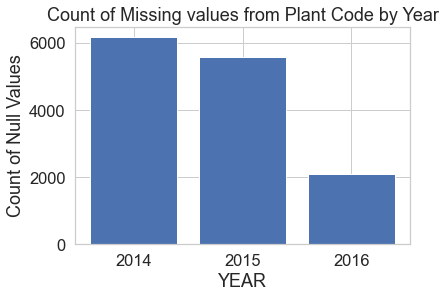

In [90]:
plt.bar(df.loc[df['PLTSP_CODE'].isna(),'YEAR'].value_counts().index,
        df.loc[df['PLTSP_CODE'].isna(),'YEAR'].value_counts())
plt.xlabel('YEAR')
plt.ylabel('Count of Null Values')
plt.title('Count of Missing values from Plant Code by Year');

Distribution of missing data by month


7    9730
6    2187
8    1942
Name: month, dtype: int64

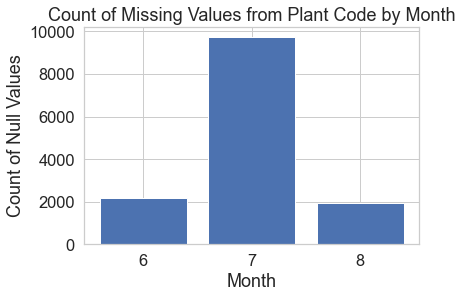

In [91]:
# show the observations that will be gone from each month
plt.bar(df.loc[df['PLTSP_CODE'].isna(),'month'].value_counts().index,
        df.loc[df['PLTSP_CODE'].isna(),'month'].value_counts())
plt.xlabel('Month')
plt.ylabel('Count of Null Values')
plt.title('Count of Missing Values from Plant Code by Month');

print("Distribution of missing data by month")
display(df.loc[df['PLTSP_CODE'].isna(),'month'].value_counts())

In [92]:
# Plant-Pollinator Status indicating missing plant species along with 
# whether or not a plant-pollinator interaction was perceived
df.loc[df['PLTSP_CODE'].isna(),'PPI_STATUS'].value_counts()

0    13859
Name: PPI_STATUS, dtype: int64

In [93]:
# Drop the missing values from the entire dataset 
df.drop(df.loc[df['PLTSP_CODE'].isna()].index,inplace=True)

### Invalid Entries

From our search of the rest of the variables there did not appear to be any outliers in the data. 

In [94]:
# values in clouds are fine based on the data dictionary
df['CLOUDS'].value_counts()
# Replace the values so that we can read them when we use them as a categorical variable
#df['CLOUDS'].replace({'S':'sunny','PC':'p_cloudy','SH':'shade','C':'cloudy'},inplace=True)

S     54151
PC     2727
SH     2009
C      1182
Name: CLOUDS, dtype: int64

In [95]:
df['WIND'].unique()

array(['ST', 'BR', nan], dtype=object)

In [96]:
# Complex values are fine based on the data dictionary
df['COMPLEX'].value_counts()

Frissell      26291
Lookout       15199
Carpenter     12040
Bunchgrass     3470
Cone           3270
Name: COMPLEX, dtype: int64

In [97]:
# MEADOW values are fine based on the data dictionary
df['MEADOW'].value_counts()

M2     11271
RP1     6594
LM      4675
NE      4285
LO      4225
RP2     4141
LS      4091
CPB     3929
CPM     3772
CPS     2684
LB      2208
CNM     1818
CPR     1655
BH      1534
BD      1380
CNT     1018
BS       556
CNE      434
Name: MEADOW, dtype: int64

In [98]:
# YEAR values are fine based on the data dictionary
df['YEAR'].value_counts()

2018    12219
2011    10275
2017     9507
2012     8185
2013     6565
2016     5935
2014     4672
2015     2912
Name: YEAR, dtype: int64

# Exploratory Data Analysis

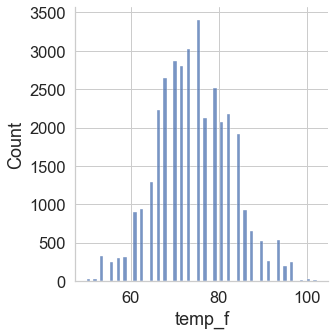

In [99]:
# seems almost normally distributed with a slight right skew
sns.displot(df['temp_f'])

In [100]:
#result['PLOT'] = result['PLOT'].astype(str)
# create the result table by grouping by year, then month, then plot of land
result = df[['YEAR','month', 'COMPLEX', 'VISSP_NAME']].groupby(['YEAR','month', 'COMPLEX']).count()
result = result.reset_index()
result.replace({'Bunchgrass':1,'Carpenter':2,'Cone':3,'Frissell':4,'Lookout':5},inplace=True)


fig = px.bar(result, x="COMPLEX", y="VISSP_NAME",  barmode="group",color='COMPLEX',
             facet_row="month", facet_col="YEAR",
             category_orders={"month": [6,7,8,9]}
            )
fig.update_traces()
fig.show()

In [101]:
#result['PLOT'] = result['PLOT'].astype(str)
# create the result table by grouping by year, then month, then plot of land
result = df[['YEAR','month', 'COMPLEX', 'temp_f']].groupby(['YEAR','month', 'COMPLEX']).agg({'temp_f':np.mean})
result = result.reset_index()
result.replace({'Bunchgrass':1,'Carpenter':2,'Cone':3,'Frissell':4,'Lookout':5},inplace=True)


fig = px.bar(result, x="COMPLEX", y="temp_f",  barmode="group",color='COMPLEX',
             facet_row="month", facet_col="YEAR",
             category_orders={"month": [6,7,8,9]}
            )
fig.update_traces()
fig.show()

## Is there any correlation between the variables you are interested in exploring?

In [102]:
df.corr()

,ENTITY,YEAR,WATCH,PLOT,START_TIME,END_TIME,MINUTE,TEMP,PPI_STATUS,NO_INT,VISSP_NO,temp_f,month
ENTITY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YEAR,NaN,1.000000,-0.060329,0.001374,-0.091916,-0.087789,0.332528,-0.379052,NaN,0.001748,-0.087289,-0.379052,-0.511674
WATCH,NaN,-0.060329,1.000000,0.015341,-0.279953,-0.096199,-0.033345,0.184579,NaN,-0.027160,0.014171,0.184579,0.637464
PLOT,NaN,0.001374,0.015341,1.000000,0.011397,0.025089,0.008046,0.029932,NaN,0.073057,-0.015979,0.029932,0.013077
START_TIME,NaN,-0.091916,-0.279953,0.011397,1.000000,0.985246,-0.020794,0.112541,NaN,0.000419,0.008532,0.112541,-0.192418
END_TIME,NaN,-0.087789,-0.096199,0.025089,0.985246,1.000000,0.007580,0.359014,NaN,0.038142,0.074107,0.359014,0.003588
MINUTE,NaN,0.332528,-0.033345,0.008046,-0.020794,0.007580,1.000000,0.009317,NaN,-0.009363,-0.118123,0.009317,-0.213294
TEMP,NaN,-0.379052,0.184579,0.029932,0.112541,0.359014,0.009317,1.000000,NaN,0.057850,-0.057258,1.000000,0.152207
PPI_STATUS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NO_INT,NaN,0.001748,-0.027160,0.073057,0.000419,0.038142,-0.009363,0.057850,NaN,1.000000,0.215656,0.057850,-0.031897


## Correlations 

Our data shows that there is a weak correlation with temperature (`temp_f` and `NO_INT`)  and number of interactions (and when we explore this topic later, the correlation becomes stronger by removing a few outliers.)

All of the other variables are related to one another (E.g. Start time and End time, PPI_Status (whether or not interactions were seen) and Number of interactions, etc.) We find that this are the only variables that we can generate any meaningful model from. 

## How would you cleanly and accurately visualize the relationship among variables?


<AxesSubplot:xlabel='temp_f', ylabel='NO_INT'>

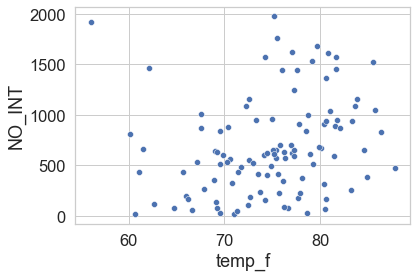

In [103]:
temp_count = df.groupby('SAMPLEDATE').agg({'NO_INT':np.sum,'temp_f':np.mean}).reset_index().dropna()
temp_count = temp_count.loc[temp_count['NO_INT']]
sns.scatterplot(x=temp_count['temp_f'],y=temp_count['NO_INT'])

In [104]:
temp_count.describe([.25,.75,.8,.85,.9,.95])

,NO_INT,temp_f
count,108.000000,108.000000
mean,687.148148,74.795449
std,478.263737,6.385315
min,18.000000,56.002791
25%,341.000000,70.543144
50%,610.500000,75.465491
75%,944.500000,79.368475
80%,1024.600000,80.456000
85%,1161.850000,81.063600
90%,1458.800000,81.860892


Based on the distribution of this data, int might be better to reduce the total observations to being anything below 2500 plant-pollinator interactions. However, this reduces the size of our data substantially, which has other implications for the strength of the model, but still important nonetheless! 

<AxesSubplot:xlabel='temp_f', ylabel='NO_INT'>

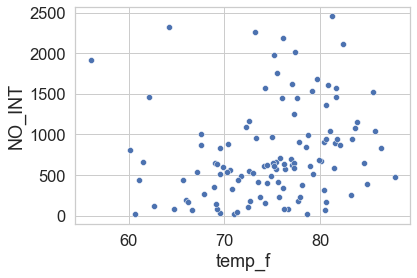

In [105]:
temp_count = df.groupby('SAMPLEDATE').agg({'NO_INT':np.sum,'temp_f':np.mean}).reset_index().dropna()
temp_count = temp_count.loc[temp_count['NO_INT']<=2500]
sns.scatterplot(x=temp_count['temp_f'],y=temp_count['NO_INT'])

In [106]:
temp_count.corr()

,NO_INT,temp_f
NO_INT,1.000000,0.194091
temp_f,0.194091,1.000000


<AxesSubplot:xlabel='temp_f', ylabel='NO_INT'>

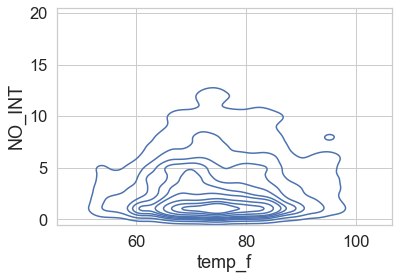

In [107]:
plot = df.loc[df['NO_INT']<20]
sns.kdeplot(x=plot['temp_f'],y=plot['NO_INT']);

## Feature Engineering

Based on our EDA, we believe that we can create the following features for our model to better predict plant-pollinator interactions: 

1. sun_dv: Based on the `CLOUDS` variable, this gives an indicator variable 1 if it was sunny out, and 0 if there was no sun.

2. wind_dv: Based on the `WIND` variable, this gives an indicator variable 1 if it was windy/breezy and 0 if there was no wind.

3. Finding alternate temperature temperature data to fill missing values: Because there are ~27,000 missing values, we want to see how closely we can predict temperatures taken thorough 

## Create Dummy Variables

In [108]:
# Create sunny dummy variables 
from sklearn.preprocessing import OneHotEncoder

def ohe_categorical(data,col):
    """
    One-hot-encodes roof material.  New columns are of the form 0x_QUALITY.
    data (dataframe): pass the series into the function call
    
    data: dataframe 
    col(str): Column passed to isolate data
    
    """
    data = data.copy()
    # create small dataframe to pass into one-hot encoder
    column = data[[col]]
    # create encoder object
    enc = OneHotEncoder()
    # fit the encoder to the data we want to encode
    enc.fit(column)
    # create a dummies dataframe to join
    dummies = pd.DataFrame(enc.transform(column).todense(),
                           columns=enc.get_feature_names(),
                           index=data.index
                          )
    # return join of data with new dummy variables
    return data.join(dummies)

In [109]:
df = ohe_categorical(df,'CLOUDS')

In [110]:
df.drop(['x0_PC', 'x0_C' ,'x0_SH', 'x0_nan'],axis=1,inplace=True)
df.rename(columns={'x0_S':'sunny_dv'},inplace=True)

In [111]:
df = ohe_categorical(df,'WIND')

In [112]:
df.drop(['x0_ST', 'x0_nan'],axis=1,inplace=True)
df.rename(columns={'x0_BR':'wind_dv'},inplace=True)

# Fill in missing temperature values

In [128]:
temp_df

id,USS0021E07S,USS0022E07S,USS0022E10S,USS0022E11S
date,,,,
2011-01-02,-10.2,-2.0,NaN,NaN
2011-01-03,-8.6,-0.8,NaN,NaN
2011-01-04,-5.7,0.2,NaN,NaN
2011-01-05,-0.2,1.5,NaN,NaN
2011-01-06,-0.1,2.4,NaN,NaN
...,...,...,...,...
2021-04-15,6.2,8.0,7.1,10.2
2021-04-16,8.2,10.6,8.7,13.0
2021-04-17,7.3,12.0,11.1,14.7


In [129]:
# create stations variable for the stations within a 10-mile radius of 
# the observation site
stations = ['USS0022E07S','USS0022E10S','USS0022E11S','USS0021E07S']
# create empty temperature dataframe
temp_df = pd.DataFrame()

# fill in temperatures dataframe
for station in stations:
    fname = full_path+data_path+station+'.csv.gz'  
    df_temp = pd.read_csv(fname, names=["ID", "DATE", "ELEMENT", "VALUE", "FLAG1", "FLAG2", "FLAG3", "FLAG4"])
    temp_df = temp_df.append(df_temp, ignore_index=True)
    
# pivot temperatures dataframe 
temp_df = temp_df.pivot(index=["ID", "DATE"], columns=["ELEMENT"],values="VALUE")
# reset index
temp_df.reset_index(inplace=True)

In [130]:
#convert everything to useful numbers and dates
temp_df['id']= temp_df['ID']
temp_df['date'] = pd.to_datetime(temp_df['DATE'], format='%Y%m%d', errors='ignore')
temp_df['precipitation_mm'] = temp_df['PRCP']/10
temp_df['snow_depth_mm'] = temp_df['SNWD']
temp_df['temp_avg_c'] = temp_df['TAVG']/10
temp_df['temp_min_c'] = temp_df['TMIN']/10
temp_df['temp_max_c'] = temp_df['TMAX']/10
temp_df['temp_obs_c'] = temp_df['TOBS']/10
temp_df['water_snow_mm'] = temp_df['WESD']/10


In [131]:
temp_df = temp_df[['id','date','temp_avg_c', 'precipitation_mm']].copy()
temp_df.head()  

ELEMENT,id,date,temp_avg_c,precipitation_mm
0,USS0021E07S,1980-07-09,NaN,NaN
1,USS0021E07S,1980-07-10,NaN,NaN
2,USS0021E07S,1980-07-11,NaN,NaN
3,USS0021E07S,1980-07-12,NaN,NaN
4,USS0021E07S,1980-07-13,NaN,NaN


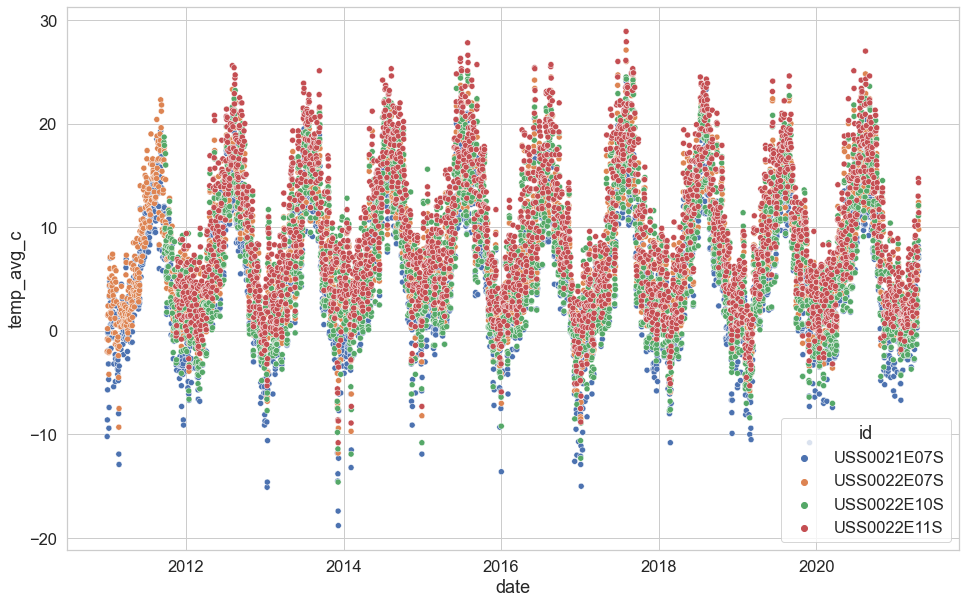

In [132]:
date = pd.to_datetime('20110101', format='%Y%m%d', errors='ignore')

plt.figure(figsize=(16, 10))
sns.scatterplot(data=temp_df[temp_df['date']>date], x = 'date', y ='temp_avg_c', hue = 'id');

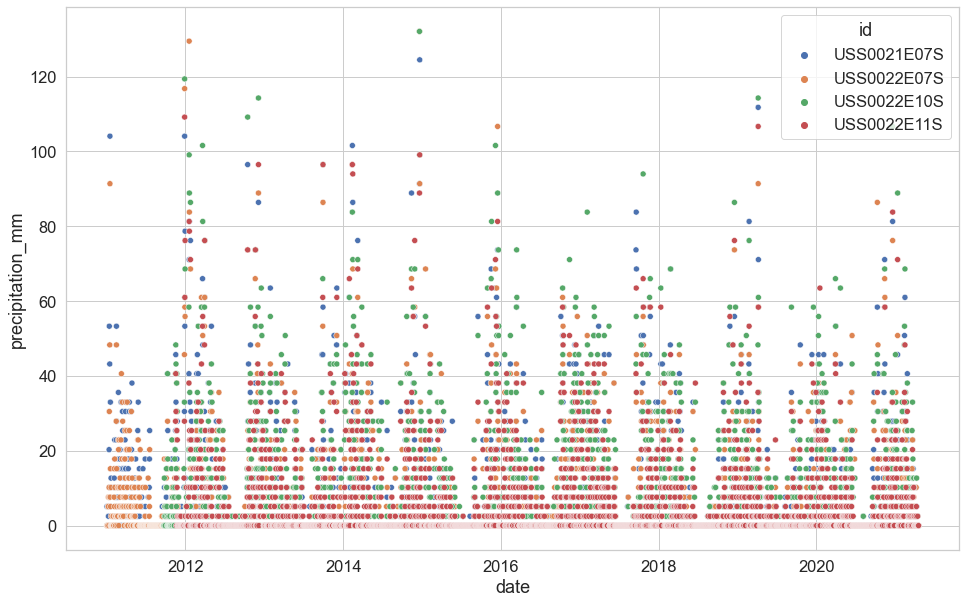

In [133]:
plt.figure(figsize=(16, 10))
sns.scatterplot(data=temp_df[temp_df['date']>date], x = 'date', y ='precipitation_mm', hue = 'id');

Now this is effectively an exercise in overplotting. We should find out what the difference from average yearly rainfall is for each of these weather stations is. 

In [134]:
avg_rain = temp_df['precipitation_mm'].mean()
std_rain = temp_df['precipitation_mm'].std()

print(avg_rain)
print(std_rain)

plot_range=np.arange(0,51,0.1)
distnormal = stats.norm.pdf(plot_range, loc=avg_rain, scale=std_rain)
distlognormal = stats.pearson3.pdf(plot_range,skew=1,loc=avg_rain, scale=std_rain)

6.4223561599306525
12.368610153099697


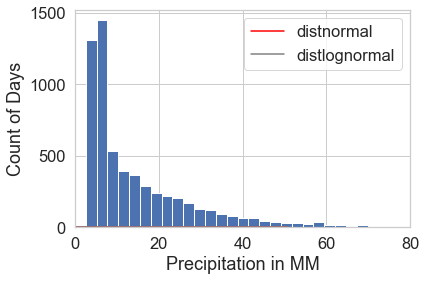

In [135]:
plt.hist(temp_df.loc[(temp_df['date']>date)&temp_df['precipitation_mm']>0]['precipitation_mm'],bins=50)
plt.plot(plot_range,distnormal, color='red', label='distnormal')
plt.plot(plot_range,distlognormal, color='grey', label='distlognormal')
plt.xlim(0,80)
plt.xlabel('Precipitation in MM')
plt.ylabel('Count of Days')
plt.legend(loc='upper right');

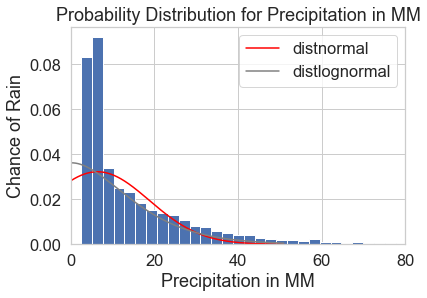

In [136]:
plt.hist(temp_df.loc[(temp_df['date']>date)&temp_df['precipitation_mm']>0]['precipitation_mm'],bins=50,
        density=True)
plt.plot(plot_range,distnormal, color='red', label='distnormal')
plt.plot(plot_range,distlognormal, color='grey', label='distlognormal')
plt.xlim(0,80)
plt.xlabel('Precipitation in MM')
plt.ylabel('Chance of Rain')
plt.title("Probability Distribution for Precipitation in MM")
plt.legend(loc='upper right');

What I want to do now is reformat the data so that the stations are individual columns, and their average temperatures are values that correspond to a given day. We can then try to merge the two datasets and see what the difference in measured temperatures look like

In [138]:
temp_df = temp_df.loc[(temp_df['date']>date)]

temp_df['temp_avg_f'] = temp_df['temp_avg_c']*1.8 + 32

ELEMENT,id,date,temp_avg_c,precipitation_mm,temp_avg_f
10808,USS0021E07S,2011-01-02,-10.2,5.1,13.64
10809,USS0021E07S,2011-01-03,-8.6,0.0,16.52
10810,USS0021E07S,2011-01-04,-5.7,0.0,21.74
10811,USS0021E07S,2011-01-05,-0.2,0.0,31.64
10812,USS0021E07S,2011-01-06,-0.1,0.0,31.82
...,...,...,...,...,...
37049,USS0022E11S,2021-04-15,10.2,2.5,50.36
37050,USS0022E11S,2021-04-16,13.0,0.0,55.40
37051,USS0022E11S,2021-04-17,14.7,0.0,58.46
37052,USS0022E11S,2021-04-18,14.3,0.0,57.74


In [139]:
temp_df = temp_df.pivot(index=["date"], columns=["id"],values="temp_avg_f")

In [144]:
temp_merge = df[['Date','temp_f']].copy()

,Date,temp_f
0,2011-07-24,NaN
1,2011-07-24,NaN
2,2011-07-24,NaN
3,2011-07-24,NaN
4,2011-07-24,NaN
...,...,...
74126,2018-07-09,71.6
74127,2018-07-09,71.6
74128,2018-07-09,71.6
74129,2018-07-09,71.6


In [146]:
temp_merge = temp_merge.merge(temp_df, left_on='Date',right_on=temp_df.index,how='left')
temp_merge.rename(columns={'USS0021E07S':'station_1','USS0022E07S':'station_2',
                          'USS0022E10S':'station_3','USS0022E11S':'station_4'},
                 inplace=True)

In [151]:
# n is enumerate, m is range
for n,m in enumerate(range(2,6)):
    temp_merge['station_diff'+str(n)]= temp_merge['temp_f'] - temp_merge.iloc[:,m]

In [ ]:
fig, axs = plt.subplots(2, 2, subplot_kw=dict(projection="polar"))
axs[0, 0].plot(x, y)
axs[1, 1].scatter(x, y)

Text(0.5, 1.0, 'station_diff3')

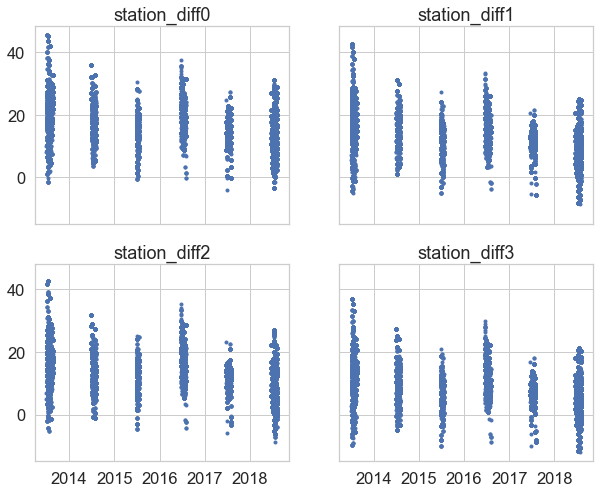

In [161]:
fig, axs = plt.subplots(nrows=2,ncols=2,sharex=True,sharey=True,figsize=(10,8))
axs[0,0].plot(temp_merge.iloc[:,0],temp_merge.iloc[:,6],'.')
axs[0,0].set_title('station_diff0')
axs[0,1].plot(temp_merge.iloc[:,0],temp_merge.iloc[:,7],'.')
axs[0,1].set_title('station_diff1')
axs[1,0].plot(temp_merge.iloc[:,0],temp_merge.iloc[:,8],'.')
axs[1,0].set_title('station_diff2')
axs[1,1].plot(temp_merge.iloc[:,0],temp_merge.iloc[:,9],'.')
axs[1,1].set_title('station_diff3')

Based on what the data shows for reach one of the weather stations, they systematically underestimate the temperatures taken, but this was likely to occur due to the nature of the GHCN data generating process. The average temperatures measured from those stations from the average temperatures from the minimum and maximums. The temperatures taken during these observations of the pollinator dataset can vary anywhere from morning to high noon in the summertime. Therefore, using this variable as a predictor for temperatures one those particular days would be ineffective. 

The decision, then is to simply drop the missing values for days in which we are missing temperature from the data, and base our model on the other parameters that we developed to train our model. 

# Data Modeling and Inferences

Please note that the following datasets have a data modeling requirement, i.e. you need to utilize at least 1 machine learning model we teach in this class in your project: 
* Topic 1 
    * Dataset A, 
    * Dataset C 
* Topic 2 - Dataset A 
* Topic 3 
    * Dataset A
    * Dataset B. 
    
For datasets not mentioned above, you are welcome to continue building machine learning model(s). Otherwise, we will be placing more emphasis on the inference part instead.

    Here are a few components your notebook must address:
        What type of machine learning problem are you investigating?
        What model do you plan on using and why?
        Does your model require hyperparameter tuning? If so, how do you approach it?
        How do you engineer the features for your model? What are the rationales behind selecting these features?
        How do you perform cross validation on your model?
        What loss metrics are you using to evaluate your model?
        From a bias-variance tradeoff standpoint, how do you assess the performance of your model? How do you check if it is overfitting?
        How would you improve your model based on the outcome?


In [246]:
from sklearn.model_selection import train_test_split
np.random.seed(42)

# Create a design matrix with all of our weather variables 
des_mat = df[['wind_dv','sunny_dv','temp_f','NO_INT']].copy()
des_mat.dropna(inplace=True)

# drop high number of interactions data
des_mat.drop(des_mat.loc[(des_mat['NO_INT']>=200)].index,inplace=True)
# drop high temperature days
des_mat.drop(des_mat.loc[des_mat['temp_f']>=110].index,inplace=True)

X = des_mat.drop('NO_INT',axis=1)
Y = pd.Series(des_mat['NO_INT'])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15)

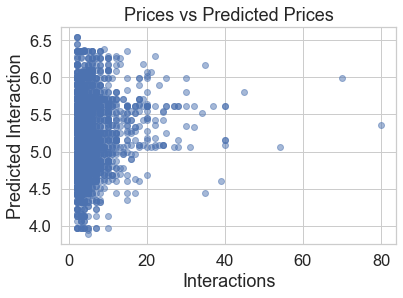

In [242]:
import sklearn.linear_model as lm

linear_model = lm.LinearRegression()

# Fit your linear model
linear_model.fit(X_train,Y_train)

# Predict housing prices on the test set
Y_pred = linear_model.predict(X_test)

# Plot predicted vs true prices
plt.scatter(Y_test, Y_pred, alpha=0.5)
plt.xlabel("Interactions")
plt.ylabel("Predicted Interaction")
plt.title("Prices vs Predicted Prices");

In [243]:
def rmse(actual_y, predicted_y):
    """
    Args:
        predicted_y: an array of the prediction from the model
        actual_y: an array of the groudtruth label
        
    Returns:
        The root mean square error between the prediction and the groudtruth
    """
    return np.sqrt(np.mean((actual_y-predicted_y)**2))

train_error = rmse(Y_train,linear_model.predict(X_train))
print("Training RMSE:", train_error)


Training RMSE: 4.766543063934428


In [244]:
from sklearn.model_selection import KFold

def compute_CV_error(model, X_train, Y_train):
    '''
    Split the training data into 4 subsets.
    For each subset, 
        fit a model holding out that subset
        compute the MSE on that subset (the validation set)

    Args:
        model: an sklearn model with fit and predict functions 
        X_train (data_frame): Training data
        Y_train (data_frame): Label 

    Return:
        the average validation MSE for the 4 splits.
    '''
    kf = KFold(n_splits=4)
    validation_errors = []
    
    for train_idx, valid_idx in kf.split(X_train):
        # split the data
        split_X_train, split_X_valid = X_train.iloc[train_idx,:] , X_train.iloc[valid_idx,:]
        split_Y_train, split_Y_valid = Y_train.iloc[train_idx] , Y_train.iloc[valid_idx]

        # Fit the model on the training split
        linear_model.fit(split_X_train, split_Y_train)
        
        # Compute the RMSE on the validation split
        error = rmse(split_Y_valid, linear_model.predict(split_X_valid))


        validation_errors.append(error)
        
    return np.mean(validation_errors)

In [245]:
errors = []
for N in range_of_num_features:
    print(f"Trying first {N} features")
    model = lm.LinearRegression()
    
    # compute the cross validation error
    error = compute_CV_error(model,X_train.iloc[:,0:N],Y_train)
    
    print("\tRMSE:", error)
    errors.append(error)

best_num_features = np.where(errors==np.min(errors))[0][0]+1
best_err = np.min(errors)

print(f"Best choice, use the first {best_num_features} features")

Trying first 1 features
	RMSE: 4.783872519454743
Trying first 2 features
	RMSE: 4.783855436337841
Trying first 3 features
	RMSE: 4.762389716821029
Best choice, use the first 3 features


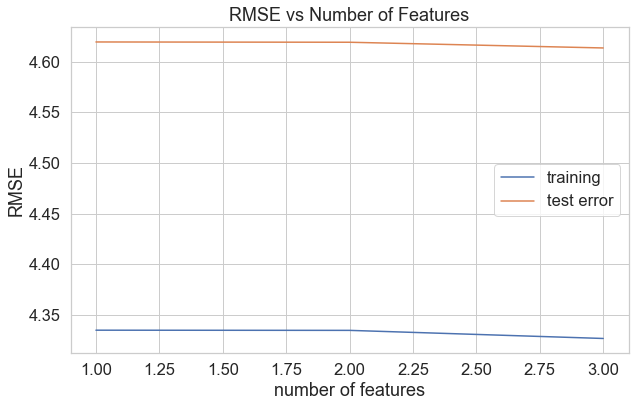

In [235]:
train_error_vs_N = []
test_error_vs_N = []

range_of_num_features = range(1, X_train.shape[1] + 1)

for N in range_of_num_features:
    X_train_first_N_features = X_train.iloc[:, :N]    
    
    linear_model.fit(X_train_first_N_features, Y_train)
    train_error_overfit = rmse(Y_train, linear_model.predict(X_train_first_N_features))
    train_error_vs_N.append(train_error_overfit)
    
    X_test_first_N_features = X_test.iloc[:, :N]
    test_error_overfit = rmse(Y_test, linear_model.predict(X_test_first_N_features))    
    test_error_vs_N.append(test_error_overfit)
    
plt.figure(figsize=(10, 6))
plt.plot(range_of_num_features, train_error_vs_N)
plt.plot(range_of_num_features, test_error_vs_N)
plt.legend(["training", "test error"])
plt.title('RMSE vs Number of Features')
plt.xlabel("number of features")
plt.ylabel("RMSE");

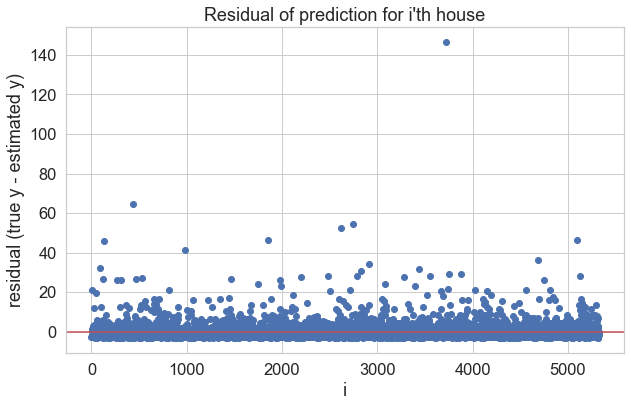

In [236]:
plt.figure(figsize=(10, 6))
plt.scatter(np.arange(len(X_test)), Y_test - linear_model.predict(X_test.iloc[:, :3]))
plt.xlabel('i')
plt.ylabel('residual (true y - estimated y)')
plt.title("Residual of prediction for i'th house")
plt.axhline(y = 0, color='r');